# Clustering (15 points):
Each item is worth 3 points.

For each question that asks to implement a function, implement it in the top cell where it is defined and then execute the function in the code cell provided below the question. <br>
You should base your answers on the output.<br>
You are allowed to implement and use additional functions. These would be defined and implemented in the
cell directly below the questions they were implemented for.

All the textual answers should be based on and justified with output from the data in the code cell above.<br>
For example, if the question asks about the correlation value, the code calculating it should appear above the answer, and the value should be in the output.
The answers should be concise and written in your own words.

### <span style="color:red">Do Not Modify the Structure of this Notebook, don't add/remove/move cells or change their type (Code/Markdown) </span>

1. [Read the feather files 'TrainQuestionsDF.feather.zstd' and 'TestQuestionsDF.feather.zstd' into pandas dataframes named train_df and test_df respectively. <br>Then convert the 'Title' column of each of them into a tf-idf vector, make sure to create the vocabulary only with the train_df, then use the same fitted TfidfVectorizer object to transform the Title column in test_df.](#q1)
<br><br>
2. [Implement the functions `kmeans_clustering(X, **kmean_kwargs)` and `dbscan_clustering(train_tfidf_vec, **dbscan_kwargs)`. <br>Each function should return the clustering model (object) and the clustering labels. Make sure to use the ***RANDOM_SEED*** for the KMeans model instantiation. <br>Then use the train and test tf-idf vectors to cluster the data using the default values for each clustering model.](#q2)
<br><br>
3. [Use the function `plot_k_distance_graph(X, k)` with the test tf-idf vectors and set k=20. <br>Answer the following questions based on the plot with regard to the DBSCAN algorithm.](#q3)
<br><br>
4. [Implement the function `plot_wcss_graph(dataset, k_range, **kmean_kwargs)` and call it with the train data title features and `k_range=range(3, 15)`.](#q4)
<br><br>
5. [Implement the function `plot_v_measure_graph(dataset, k_range, y_true, **kmean_kwargs)` and call it with the train data title features and `k_range=range(3, 15)`.](#q5)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN, MiniBatchKMeans, KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import silhouette_score, v_measure_score
from sklearn.neighbors import NearestNeighbors

In [2]:
# TODO: Any additional (if needed) import statements should be in this cell

In [3]:
# TODO: Set the random seed as your student id (only numbers)
RANDOM_SEED = 3955778
np.random.seed(RANDOM_SEED)

In [4]:
# This cell is for functions given to you to use

plt.style.use('ggplot')


def read_feather_to_df(feather_file_name):
    """
    The function expects to receive a path to feather file,
    it will read the file from the disk into a pandas dataframe
    """
    return pd.read_feather(feather_file_name)


def plot_k_distance_graph(X, k):
    """
    The function receives a dataset expressed as numerical features and plots the k-distance graph for DBSCAN
    :param X: ndarray, pd.DataFrame or a sparse matrix; data features
    :param k: int; will plot the distances to the k'th nearest neighbor of each sample
    :return: None
    """
    # create a new instance of NearestNeighbors and assign to the variable nbrs
    nbrs = NearestNeighbors(n_neighbors=k + 20)
    # Fit the nearest neighbors estimator on the data
    nbrs.fit(X)
    # Find the "n_neighbors" nearest neighbors for every point, returns indices of and distances to the neighbors of each point in sorted order.
    distances, indices = nbrs.kneighbors(X)
    # remember that the index of the n-th element is n-1
    k_distance = distances[:, k - 1]  # array with the distance of every n-th neighbour
    k_distance = np.sort(k_distance)  # sort in ascending order

    plt.figure(figsize=(15, 10))  # create and define the figure
    plt.plot(k_distance)
    plt.title(f"{k}-distance graph for DBSCAN")
    plt.ylabel("$\epsilon$ distance")
    plt.xlabel("number of core points")
    plt.gca().invert_xaxis()  # gca used to get current axes, then invert_xaxis() will invert the x axis
    plt.grid(True)  # add grid to the plot
    plt.show()

In [5]:
# This cell is for all the functions you are expected to implement.
# You should implement them here and only call them below when they are mentioned in a question.

def select_numeric_non_id_columns(df):
    """
    Return a subset of a DataFrame’s columns based on the column dtypes,
    including only numerical columns and excluding columns with the string id (case-insensitive) in their name
    :param df: pd.DataFrame
    :return: pd.DataFrame
    """
    Z = (df.select_dtypes(include=['int64'], exclude=["string"])).drop('Id',axis=1)
    
    return Z


def series_to_tfidf(sr, **kwargs):
    """
    The function receives an array or a pandas Series that contains text strings (a.k.a documents).
    It then converts the documents into a matrix of TF-IDF features
    The function should return two objects:
    TfidfVectorizer object after it learned (fitted) the vocabulary and idf from the training set,
    and a document-term matrix (the original documents array transformed into a TF-IDF features matrix).
    """
    # TODO: write your code here
    pass


def kmeans_clustering(X, **kmean_kwargs):
    """
    The function receives a dataset expressed as numerical features, clusters the data and returns the
    fitted clustering model and the cluster labels for the data.
    First test if the number of samples in the dataset is larger or equal to 10,000,
    if it is: use the class MiniBatchKMeans(random_state=RANDOM_SEED, batch_size=2048, **kmean_kwargs)
    it the number of samples is less than 10K, use the class KMeans(random_state=RANDOM_SEED, **kmean_kwargs)
    Add a print call that will indicate which model was used.
    :param X: ndarray, pd.DataFrame or a sparse matrix; data features
    :param kmean_kwargs: key-word arguments that will be passed to kmeans clustering class
    :return: two objects, the fitted clustering object and the cluster labels for the data
    """
    # TODO: write your code here
    pass


def dbscan_clustering(X, **dbscan_kwargs):
    """
    The function receives a dataset expressed as numerical features, clusters the data and returns the
    fitted clustering model and the cluster labels for the data.
    :param X: ndarray, pd.DataFrame or a sparse matrix; data features
    :param dbscan_kwargs: key-word arguments that will be passed to dbscan clustering class
    :return: two objects, the fitted clustering object and the cluster labels for the data
    """
    # TODO: write your code here
    pass


def plot_wcss_graph(dataset, k_range=range(3, 15), **kmean_kwargs):
    """
    The function receives a dataset expressed as numerical features and plots the WCSS (a.k.a inertia) graph
    using K-Means clustering over a range of K values.
    The y-axis of the graph represents WCSS (inertia) and x-axis the number of clusters.
    The plot should be readable and have proper title and labels.
    You should use the function `kmeans_clustering`.
    :param dataset: ndarray, pd.DataFrame or a sparse matrix; data features
    :param k_range: an iterable object, e.g. list, tuple, range, etc.
    :param kmean_kwargs: key-word arguments that will be passed to kmeans clustering class
    """
    # TODO: write your code here
    pass


def plot_v_measure_graph(dataset, y_true, k_range=range(3, 15), **kmean_kwargs):
    """
    The function receives a dataset expressed as numerical features and plots the V-measure graph
    using K-Means clustering over a range of K values.
    The y-axis of the graph represents V-measure and x-axis the number of clusters.
    The plot should be readable and have proper title and labels.
    You should use the function `kmeans_clustering` and sklearn's v_measure_score() to calculate the V-measure values.
    :param dataset: ndarray, pd.DataFrame or a sparse matrix; data features
    :param k_range: an iterable object, e.g. list, tuple, range, etc.
    :param y_true: array-like; ground truth class labels
    :param kmean_kwargs: key-word arguments that will be passed to kmeans clustering class
    """
    # TODO: write your code here
    pass


def plot_silhouette_coefficient_graph(dataset, k_range=range(3, 15), **kmean_kwargs):
    """
    The function receives a dataset expressed as numerical features and plots the silhouette coefficient graph
    using K-Means clustering over a range of K values.
    The y-axis of the graph represents silhouette coefficient and x-axis the number of clusters.
    The plot should be readable and have proper title and labels.
    You should use the function `kmeans_clustering`.
    :param dataset: ndarray, pd.DataFrame or a sparse matrix; data features
    :param k_range: an iterable object, e.g. list, tuple, range, etc.
    :param kmean_kwargs: key-word arguments that will be passed to kmeans clustering class
    """
    # TODO: write your code here
    pass

### <a name="q1"></a> 1. Read the feather files 'TrainQuestionsDF.feather.zstd' and 'TestQuestionsDF.feather.zstd' into pandas dataframes named train_df and test_df respectively. <br>Then convert the 'Title' column of each of them into a tf-idf vector, make sure to create the vocabulary only with the train_df, then use the same fitted TfidfVectorizer object to transform the Title column in test_df.<br>Answer the following questions below: <br>1.1 What is the shape of the generated tf-idf objects? <br>1.2 What is the size of the generated vocabulary?

In [6]:
train_df = read_feather_to_df('TrainQuestionsDF.feather.zstd')
test_df = read_feather_to_df('TestQuestionsDF.feather.zstd')

vectorizer = TfidfVectorizer()
train_df['Title'] = vectorizer.fit_transform(train_df['Title']).getnnz()
test_df['Title'] = vectorizer.fit_transform(test_df['Title']).getnnz()

train_df = select_numeric_non_id_columns(train_df)
test_df = select_numeric_non_id_columns(test_df)

print(vectorizer.get_feature_names_out().shape)

print(vectorizer.get_feature_names_out().size)



(4447,)
4447


*Write your answers to 1 here (1-2 sentences per item):*


## Intrinsic clustering evaluation
### <a name="q2"></a> 2. Implement the functions `kmeans_clustering(X, **kmean_kwargs)` and `dbscan_clustering(X, **dbscan_kwargs)`. <br>Each function should return the clustering model (object) and the clustering labels. Make sure to use the RANDOM_SEED for the KMeans model instantiation. <br>Then use the train and test tf-idf vectors to cluster the data using the default values for each clustering model. <br>Answer the following questions: <br>2.1 How many clusters were formed for the train data using each clustering method? <br>2.2 Which method achieved a result closer to the actual number of labels? justify you answer with the data <br>2.3 Propose a short possible explanation to the observed outcome in 2.2

In [7]:
#Kmeans

kmeans = KMeans(random_state=RANDOM_SEED).fit(train_df)

print(set(kmeans.labels_))

#DB_Scan

clusters = DBSCAN().fit(train_df)

print(set(clusters.labels_))




{0, 1, 2, 3, 4, 5, 6, 7}
{-1}


* 2.1 Eight and none respectively, excluding the noise from DB_scan
* 2.2 Kmeans achieved a closer result, it was only one off
* 2.3 The data likely doesn't form any meaningful shape in cartesian space, the data is evenly spread out.

### <a name="q3"></a> 3. Use the function `plot_k_distance_graph(X, k)` with the test tf-idf vectors and set k=20. <br>Answer the following questions based on the plot with regard to the DBSCAN algorithm: <br> 3.1 What should be a good epsilon value for this data? <br>3.2 From which epsilon values would DBSCAN likely result with all the samples in the same cluster? <br>3.3 From which epsilon values would DBSCAN likely result with most of the samples as outliers?

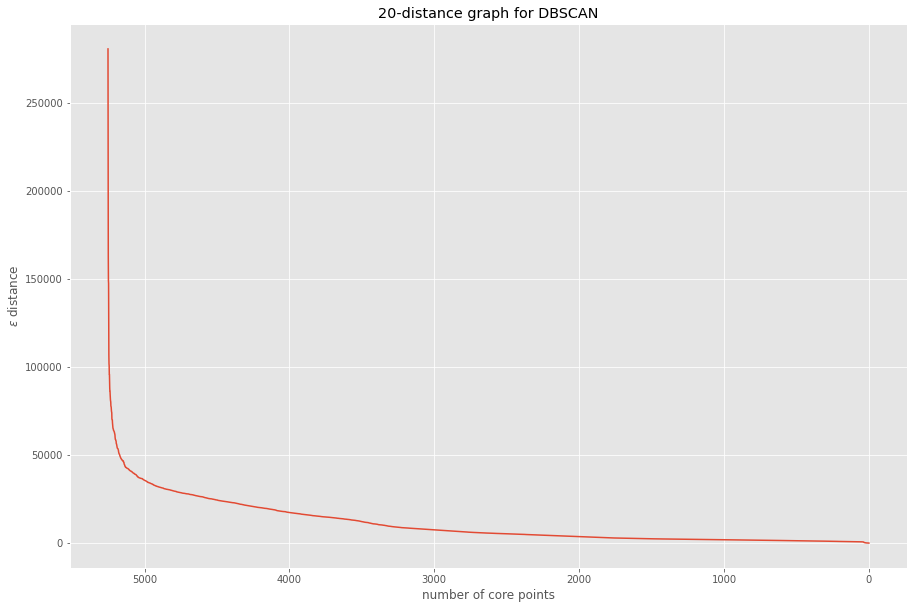

In [8]:
plot_k_distance_graph(test_df, 20)

* 3.1 I'm ignorant on how to eactly interpret the scale of the y axis but optimal eps would be at the elbow point so just under 50000 (.48 perhaps?)
* 3.2 eps = 1
* 3.3 eps = .1

### <a name="q4"></a> 4. Implement the function `plot_wcss_graph(dataset, k_range, **kwargs)` and call it with the train data title features and `k_range=range(3, 15)` then answer the following questions:<br> 4.1 Based on the plot, using the "elbow method" which numbers are suitable candidates as a good number of clusters? <br>4.2 Which number of clusters will minimize the WCSS? <br>4.3 What is the rational of the elbow method? Which number of clusters will minimize the WCSS?

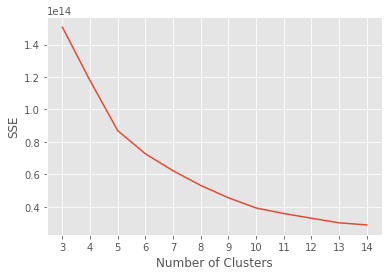

In [9]:
kmeans_kwargs = {
"init": "random",
"n_init": 15,
"random_state": RANDOM_SEED,
}

sse = []
for k in range(3, 15):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(train_df)
    sse.append(kmeans.inertia_)
    

plt.plot(range(3, 15), sse)
plt.xticks(range(3, 15))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

* 4.1 K= 7 or 8 seem best
* 4.2 Seven, the number of labels there are
* 4.3 The elbow method prevents any overfitting by indicating the point where diminishing returns become too costly. As th egraph flattens out increasing the value of K becomes meaningless.

## Extrinsic clustering evaluation
### <a name="q5"></a> 5. Implement the function `plot_v_measure_graph(dataset, k_range, y_true)` and call it with the train data title features and `k_range=range(3, 15)` then answer the following questions:<br> 5.1 Based on the plot, which number of clusters yields the best result? <br>5.2 Compare the result of this extrinsic evaluation measure with the previous intrinsic evaluation results. What are the reasons choose one over the other?

*Write your answers to 5 here (1-2 sentences for the first item, up to 4 senteces for the second):*